In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using QCBase
using RDM
using ClusterMeanField

readdir()

  Activating project at `~/code/FermiCG`


17-element Vector{String}:
 ".ipynb_checkpoints"
 "Cact.molden"
 "cluster_N32.ipynb"
 "cluster_N32.jl"
 "cmf.molden"
 "density_mat.npy"
 "integrals_h0.npy"
 "integrals_h1.npy"
 "integrals_h2.npy"
 "mo_coeffs_act.npy"
 "mo_coeffs_doc.npy"
 "nat_orb_active_space.out"
 "nat_orb_active_space.py"
 "orbitals.molden"
 "overlap_mat.npy"
 "run_tpsci.sh"
 "slurm-567534.out"

In [2]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);

In [3]:
#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npy"), 
    npzread("integrals_h1.npy"), 
    npzread("integrals_h2.npy") 
);
C = npzread("mo_coeffs_act.npy")
S = npzread("../overlap_mat.npy");
D = npzread("../density_mat.npy");

┌ Info: Precompiling SpectralClustering [a9453432-0461-11e9-1276-9b1ac3d3d0c6]
└ @ Base loading.jl:1423


 Laplacian Eigenvalues
    1  -0.00000000
    2   0.11163096
    3   0.15549214
    4   0.19801307
    5   0.40568306
    6   0.41938333
    7   0.44927491
    8   0.45681886
    9   0.46211957
   10   0.48615781
   11   0.49947195
   12   0.63874073
   13   0.65534801
   14   0.67881413
   15   0.70009244
   16   0.75899960
   17   0.79567986
   18   0.82801427
   19   0.84925095
   20   0.93242682
   21   0.95250116
   22   0.96052849
   23   0.99086625
   24   1.03717018
   25   1.08084742
   26   1.11889609
   27   1.13468724
   28   1.14427120
   29   1.16095747
   30   1.17977335
   31   1.22219986
   32   1.38811154
[1, 5, 9, 13, 16, 24, 28, 32, 2, 6, 7, 10, 15, 18, 22, 23, 4, 12, 17, 20, 21, 26, 27, 31, 3, 8, 11, 14, 19, 25, 29, 30]

/Users/nicole/opt/anaconda3/envs/tpsci/lib/python3.7/site-packages/pyscf/lib/misc.py:106: UserWarning: OpenMP is not available. Setting omp_threads to 1 has no effects.
  'Setting omp_threads to %s has no effects.' % n)


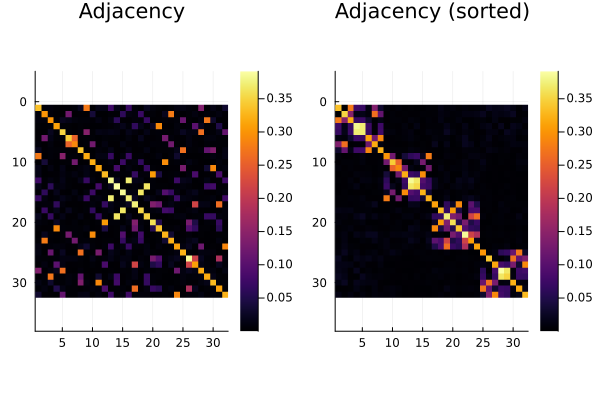

In [4]:
using LinearAlgebra, Printf
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(clustering)
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end

n_clusters = 4
adjacency = abs.(C'*D*C)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 

ints_sorted = deepcopy(ints)
ints_sorted.h1 .= ints.h1[perm,perm]
ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];
C_sorted = C[:,perm]
FermiCG.pyscf_write_molden(mol,C_sorted,filename="orbitals.molden");

plot(p1, p2, layout = @layout [a b])

In [5]:
# define clusters
cluster_list = [collect(1:8), collect(9:16), collect(17:24), collect(25:32)]
clusters = [MOCluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]
init_fspace = [ (4,4) for i in 1:n_clusters]
display(clusters)


IDX001:DIM65536:001|002|003|004|005|006|007|008|
IDX002:DIM65536:009|010|011|012|013|014|015|016|
IDX003:DIM65536:017|018|019|020|021|022|023|024|
IDX004:DIM65536:025|026|027|028|029|030|031|032|


In [13]:
rdm1 =  C_sorted' * S * D * S * C_sorted * .5
#display(RDM1(n_orb(ints_sorted)))
#display(RDM1(rdm1, rdm1))
#error("here")
#e_cmf, U_cmf, Da, Db  = FermiCG.cmf_oo(ints_sorted, clusters, init_fspace, rdm1, rdm1, max_iter_oo=50, verbose=0, gconv=1e-6, method="gd", sequential=true);

#C_cmf = C_sorted * U_cmf
#ints_cmf = FermiCG.orbital_rotation(ints_sorted, U_cmf);

e_cmf, U_cmf, d1  = ClusterMeanField.cmf_oo(ints_sorted, clusters, init_fspace, RDM1(rdm1, rdm1),
                                        verbose=0, gconv=1e-5, method="bfgs", sequential=false);

C_cmf = C_sorted * U_cmf
ints_cmf = orbital_rotation(ints_sorted, U_cmf);
@save  "cmf_tetracence.jld2" ints_cmf d1 clusters init_fspace C_cmf

 ooCMF Iter:    1 Total= -2754.652791629814 Active= -59.371217756988 G=     1.44e-01
 ooCMF Iter:    2 Total= -2754.659116061092 Active= -59.377542188266 G=     3.32e-02
 ooCMF Iter:    3 Total= -2754.659571475035 Active= -59.377997602209 G=     1.04e-02
 ooCMF Iter:    4 Total= -2754.659633380417 Active= -59.378059507591 G=     6.42e-03
 ooCMF Iter:    5 Total= -2754.659674924468 Active= -59.378101051642 G=     7.10e-03
 ooCMF Iter:    6 Total= -2754.659722133852 Active= -59.378148261026 G=     5.38e-03
 ooCMF Iter:    7 Total= -2754.659735988162 Active= -59.378162115336 G=     2.12e-03
 ooCMF Iter:    8 Total= -2754.659738394066 Active= -59.378164521240 G=     1.43e-03
 ooCMF Iter:    9 Total= -2754.659741549585 Active= -59.378167676759 G=     1.91e-03
 ooCMF Iter:   10 Total= -2754.659744176037 Active= -59.378170303211 G=     1.12e-03
 ooCMF Iter:   11 Total= -2754.659744748202 Active= -59.378170875376 G=     4.50e-04
 ooCMF Iter:   12 Total= -2754.659744834351 Active= -59.378170961

 * Status: success

 * Candidate solution
    Final objective value:     -2.754660e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.52e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.84e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.31e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.20e-12 ≰ 0.0e+00
    |g(x)|                 = 7.11e-06 ≤ 1.0e-05

 * Work counters
    Seconds run:   347  (vs limit Inf)
    Iterations:    32
    f(x) calls:    92
    ∇f(x) calls:   92


*ooCMF -2754.65974500 


In [14]:
ints = ints_cmf
C = C_cmf;
FermiCG.pyscf_write_molden(mol,C_cmf, filename="cmf.molden");

In [18]:
M = 10
ref_fock = FockConfig(init_fspace)
#
# Build Cluster basis
#cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
#        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);
cluster_bases = FermiCG.compute_cluster_eigenbasis_spin(ints, clusters, d1, [2,2,2,2], ref_fock, max_roots=M, verbose=1);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, d1.a, d1.b, verbose=0);

IDX001:DIM65536:001|002|003|004|005|006|007|008|
 Number of embedded electrons a,b: 12.000000 12.000000


 FCIAnsatz:: #Orbs = 8   #α = 4  #β = 5  Dimension: 3920     
   State    1 Energy:  -6.98464537 S2:   0.75000000
   State    2 Energy:  -6.90647741 S2:   0.75000000
   State    3 Energy:  -6.89783274 S2:   0.75000000
   State    4 Energy:  -6.89516414 S2:   0.75000000
   State    5 Energy:  -6.84691148 S2:   3.75000000
   State    6 Energy:  -6.83816482 S2:   3.75000000
   State    7 Energy:  -6.82612249 S2:   0.75000000
   State    8 Energy:  -6.82438874 S2:   0.75000000
   State    9 Energy:  -6.81260031 S2:   0.75000000
   State   10 Energy:  -6.78676311 S2:   0.75000000

 FCIAnsatz:: #Orbs = 8   #α = 2  #β = 5  Dimension: 1568     
   State    1 Energy:  -6.67862524 S2:   3.75000000
   State    2 Energy:  -6.65878778 S2:   3.75000000
   State    3 Energy:  -6.61736920 S2:   3.75000000

 FCIAnsatz:: #Orbs = 8   #α = 6  #β = 3  Dimension: 1568     
   State    1 Energy:  -6.8469

In [ ]:
#using JLD2
#@save "cmf_data.jld2" ints Da Db e_cmf U_cmf cluster_bases clusters init_fspace

In [19]:
nroots = 31
ci_vector = FermiCG.TPSCIstate(clusters, ref_fock, R=nroots);
#ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
# Add the lowest energy single exciton to basis
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([3,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,3,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,3,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,3])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([4,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,4,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,4,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,4])] = zeros(Float64,nroots)

# TT states ms=0
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,2])] = zeros(Float64,nroots)

# Spin-flip states
fspace_0 = FermiCG.FockConfig(init_fspace)

## ba
tmp_fspace = FermiCG.replace(fspace_0, (1,2), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,3), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,4), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,3), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,4), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (3,4), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)

## ab
tmp_fspace = FermiCG.replace(fspace_0, (1,2), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,3), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,4), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,3), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,4), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (3,4), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)

FermiCG.eye!(ci_vector)

e0, vec_out = FermiCG.tps_ci_direct(ci_vector, cluster_ops, clustered_ham)
ci_vector = vec_out

e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =-1,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            max_iter=10,
                            incremental=false,
                            max_mem_ci=100);
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);

println()
println("       *======TPSCI results======*")
@printf("TCI Thresh: %8.6f  Dim:%8d\n",1e-3,size(v0)[1])
println()
@printf("TCI %5s %12s %12s\n", "Root", "E(0)", "E(2)")
for r in 1:nroots
    @printf("TCI Electronic %5s %12.8f %12.8f\n",r, e0[r], e0[r] + e2[r])
    #@printf("TCI %5s %12.8f %12.8f\n",r, e0[r] + ecore, e0[r] + e2[r] + ecore)
    display(v0,thresh=1e-4,root=r)
end

@save "M10.jld2" clusters d1 ints C cluster_bases ci_vector e0 v0 e2



 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    31: 
 Build full Hamiltonian matrix with dimension:       0.380217 seconds (1.11 M allocations: 57.417 MiB, 99.35% compilation time)
 Now diagonalize
 Diagonalization time:                               0.000459 seconds
(31, 31)(31, 31)
 Compute S2 expectation values:                      0.304133 seconds (469.55 k allocations: 25.963 MiB, 99.64% compilation time)
  Root       Energy           S2
     1 -59.37817167   0.00001418
     2 -59.30255599   2.00000000
     3 -59.30233237   2.00000000
     4 -59.30188484   2.00000000
     5 -59.30157989   2.00000000
     6 -59.23500481   2.00000000
     7 -59.23487706   2.00000000
     8 -59.23451241   2.00000000
     9 -59.23441882   2.00000000
    10 -59.23022015   0.00009343
    11 -59.22926797   0.00008428
    12 -59.22705158   0.00086696
    13 -59.22671961   3.99901070
    14 -59.22622680   3.79040005
    15 -59.22617894   0.23608509


┌ Warning: Linear dependency detected. Restarting.
└ @ BlockDavidson /Users/nicole/.julia/packages/BlockDavidson/FZQc5/src/BlockDavidson.jl:200


 Iter:   4 SS: 53   E:  -59.37831933   -59.30422009   -59.30323026   -59.30266666   -59.30216155   -59.23646369   -59.23572113   -59.23538126   -59.23520986   -59.23321464   -59.23132034   -59.22919221   -59.22904411   -59.22829470   -59.22807104   -59.22761681   -59.22736576   -59.22697938   -59.22641135   -59.17595048   -59.17432372   -59.16868912   -59.16452603   -59.15253022   -59.14486407   -59.12221173   -59.11347918   -59.10282830   -58.99645048   -58.98644495   -58.95580776   R: 6.9e-04  3.5e-03  2.8e-03  2.7e-03  2.2e-03  3.9e-03  3.3e-03  3.9e-03  3.8e-03  1.1e-02  5.9e-03  7.3e-03  5.3e-03  7.5e-03  6.1e-03  4.3e-03  3.9e-03  3.4e-03  3.4e-03  4.5e-02  5.0e-02  5.5e-02  6.5e-02  6.3e-02  7.6e-02  5.8e-02  6.2e-02  4.6e-02  1.5e-01  1.4e-01  1.5e-01   LinDep: 1.1e-14* 
 Iter:   5 SS: 72   E:  -59.37832095   -59.30427050   -59.30326327   -59.30269978   -59.30218190   -59.23653555   -59.23579877   -59.23548633   -59.23531008   -59.23371763   -59.23150423   -59.22954616   -59.22

┌ Warning: Linear dependency detected. Restarting.
└ @ BlockDavidson /Users/nicole/.julia/packages/BlockDavidson/FZQc5/src/BlockDavidson.jl:200


 Iter:  47 SS: 38   E:  -59.37832113*  -59.30427856*  -59.30326901*  -59.30270526*  -59.30218449*  -59.23659293*  -59.23583452*  -59.23557758*  -59.23541921*  -59.23412103*  -59.23173236*  -59.23000462*  -59.22930043*  -59.22892269*  -59.22869649*  -59.22816626*  -59.22794161*  -59.22771720*  -59.22746714*  -59.22734587*  -59.22720369   -59.22715856   -59.22702482   -59.22688545*  -59.22684412*  -59.22676126*  -59.22637987*  -59.22543923   -59.22543534   -59.21217979*  -59.20954885*  R: 7.0e-11* 1.7e-09* 4.4e-09* 3.4e-09* 2.8e-09* 4.8e-07* 8.1e-07* 5.7e-07* 5.3e-07* 9.7e-07* 3.6e-07* 5.4e-07* 7.5e-07* 7.5e-07* 1.2e-06* 1.3e-06* 1.5e-06* 5.9e-06* 3.9e-06* 4.5e-06* 1.2e-05  3.9e-05  1.1e-05  8.1e-06* 5.5e-06* 5.8e-06* 1.8e-06* 4.5e-05  9.0e-05  6.5e-06* 6.5e-06*  LinDep: 1.5e-14* 
 Iter:  48 SS: 41   E:  -59.37832113*  -59.30427856*  -59.30326901*  -59.30270526*  -59.30218449*  -59.23659293*  -59.23583452*  -59.23557758*  -59.23541921*  -59.23412103*  -59.23173236*  -59.23000462*  -59.22

┌ Warning: Linear dependency detected. Restarting.
└ @ BlockDavidson /Users/nicole/.julia/packages/BlockDavidson/FZQc5/src/BlockDavidson.jl:200


 Iter:  37 SS: 38   E:  -59.37833425*  -59.30429677*  -59.30327736*  -59.30271677*  -59.30219201*  -59.23661452*  -59.23584961*  -59.23559829*  -59.23544479*  -59.23421828*  -59.23179779*  -59.23013085*  -59.22967777*  -59.22920018*  -59.22912502*  -59.22902756*  -59.22890042*  -59.22888364*  -59.22851004*  -59.22837334*  -59.22813337*  -59.22806957*  -59.22785782*  -59.22746080*  -59.22724715*  -59.22709016   -59.22689476   -59.22684805   -59.22653224   -59.22647341   -59.22638633   R: 3.3e-07* 1.2e-06* 1.5e-06* 3.0e-06* 3.2e-06* 4.8e-06* 3.6e-06* 5.1e-06* 4.9e-06* 3.4e-06* 1.7e-06* 3.2e-06* 3.3e-06* 6.3e-06* 5.4e-06* 4.8e-06* 6.5e-06* 5.4e-06* 6.2e-06* 7.1e-06* 6.7e-06* 8.2e-06* 5.9e-06* 8.6e-06* 8.3e-06* 2.0e-05  4.0e-05  4.6e-05  4.9e-05  6.2e-05  2.0e-05   LinDep: 4.4e-16* 
 Iter:  38 SS: 43   E:  -59.37833425*  -59.30429677*  -59.30327736*  -59.30271677*  -59.30219201*  -59.23661452*  -59.23584961*  -59.23559829*  -59.23544479*  -59.23421828*  -59.23179779*  -59.23013085*  -59.22

┌ Warning: ("initial guess det(v0'v0) = ", 0.999999999999986)
└ @ FermiCG /Users/nicole/code/FermiCG/src/type_TPSCIstate.jl:545


  0.113820 seconds (6.73 M allocations: 157.177 MiB)
 Compute <0|H|0>:                                   14.797903 seconds (212.63 M allocations: 4.599 GiB, 5.95% gc time)
 Number of jobs:    16892
 Number of threads: 6
   |----------------------------------------------------------------------------------------------------|
   |0%                                                                                              100%|
   |---------------------------------------------------------------------------------------------------|
 Time spent computing E2         38.0 (s)
  Root         E(0)         E(2)
     1 -59.37833597 -59.37835583
     2 -59.30429827 -59.30433156
     3 -59.30327797 -59.30331286
     4 -59.30271890 -59.30274935
     5 -59.30219235 -59.30222533
     6 -59.23661577 -59.23665224
     7 -59.23585172 -59.23589805
     8 -59.23559917 -59.23563412
     9 -59.23544490 -59.23548511
    10 -59.23422014 -59.23428465
    11 -59.23179975 -59.23184824
    12 -59.23013248 -59.2